In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# Import data from csv
customer_data = pd.read_csv('wholesale_customer_data.csv')
customer_data.shape

(440, 8)

In [2]:
customer_data.sum()

Channel                 582
Region                 1119
Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicassen           670943
dtype: int64

In [3]:
# Select data for analysis.
# 0=Channel, 1=Region, 2=Fresh, 3=Milk, 4=Grocery, 5=Frozen, 6=Detergents_Paper, 7=Delicassen
analysis1 = customer_data.iloc[:, [3,4]]
analysis1_name = list(analysis1.columns.values.tolist())

<Axes: >

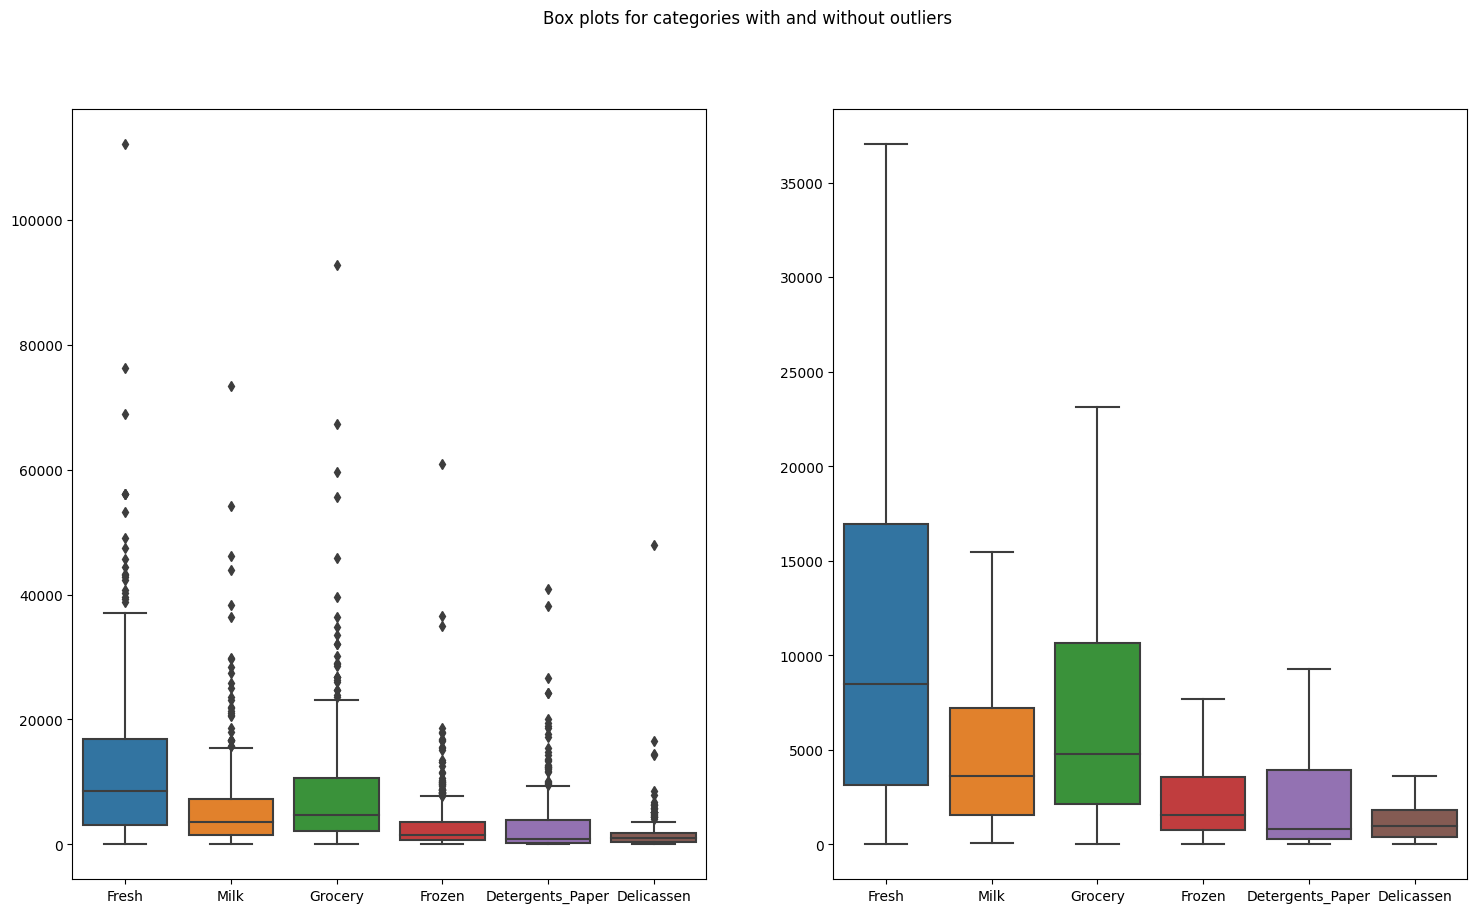

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Box plots for categories with and without outliers')

sns.boxplot(ax=axes[0], data=customer_data.iloc[:, 2:8])
sns.boxplot(ax=axes[1], data=customer_data.iloc[:, 2:8],showfliers=False)

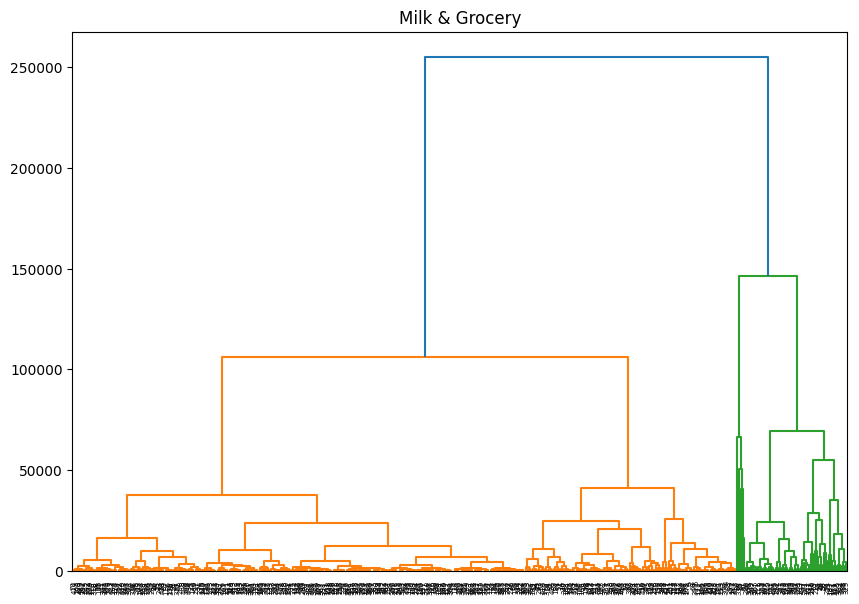

In [5]:
plt.figure(figsize=(10,7))
plt.title(analysis1_name[0] + ' & ' + analysis1_name[1])
dend = shc.dendrogram(shc.linkage(analysis1, method='ward'))

Text(0, 0.5, 'Sum of squared distance')

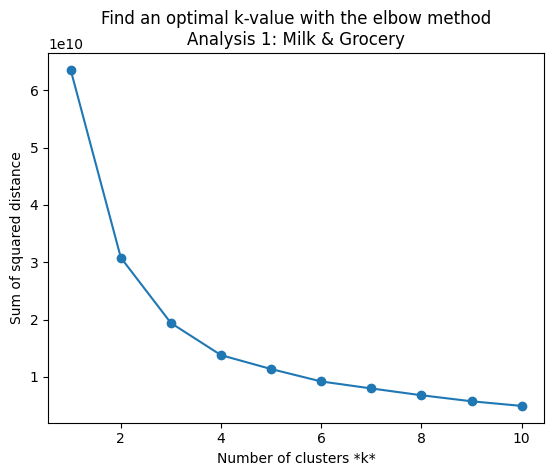

In [6]:
# k_list is the list of range in between we want to find clusters for
k_list = list(range(1, 11))

# SSE is the Sum of Squared Errors
sse = []

for k in k_list:
    # km_model is the KMeans where we define the model for fitting the data
    km_model = KMeans(n_clusters=k, n_init=10)
    
    # fitting the data (data is the data set) to km_model
    km_model.fit(analysis1)
    sse.append(km_model.inertia_)

# Plot sse against k and find the value of k where it starts to flatten down and make angle like elbow.
plt.plot(k_list, sse, '-o')
plt.title('Find an optimal k-value with the elbow method\nAnalysis 1: ' + analysis1_name[0] + ' & ' + analysis1_name[1])
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

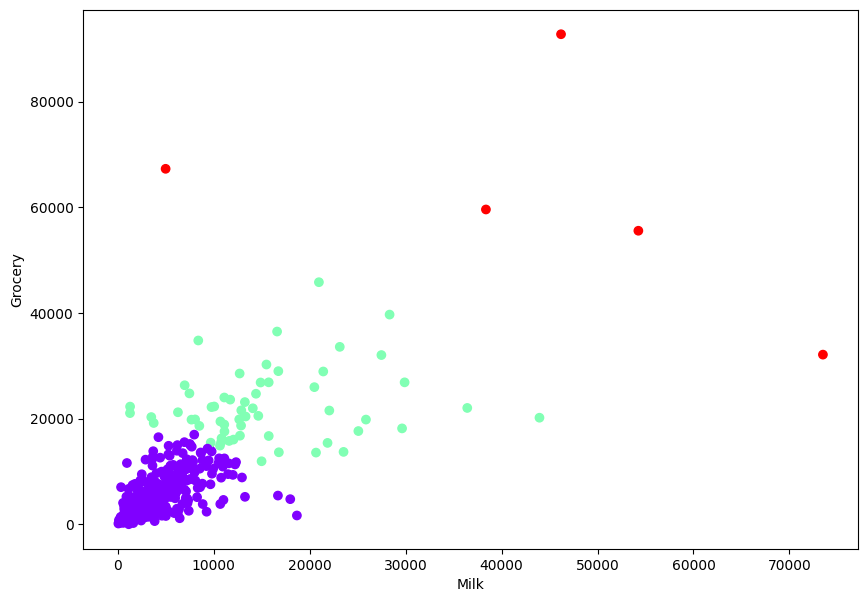

In [7]:
k = 3
cluster = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
cluster.fit_predict(analysis1.values)
plt.figure(figsize=(10,7))
plt.xlabel(analysis1_name[0])
plt.ylabel(analysis1_name[1])
plt.scatter(analysis1.values[:,0], analysis1.values[:,1], c=cluster.labels_, cmap="rainbow")